**Hands-on Activity 9.2 Customized Visualizations using Seaborn**

**Instructions:**

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

**Resources:**

- Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csv

**Procedures:**

- 9.4 Introduction to Seaborn - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/30c416e749b911478fd2d436938101064d3a6b20/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.2)/9.4%20Introduction%20to%20Seaborn
- 9.5 Formatting Plots - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/30c416e749b911478fd2d436938101064d3a6b20/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.2)/9.5%20Formatting%20Plots
- 9.6 Customizing Visualizations - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/30c416e749b911478fd2d436938101064d3a6b20/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.2)/9.6%20Customizing%20Visualizations

**Data Analysis:**

- Provide comments on output from the procedures.

- 9.4 Introduction to Seaborn - The method shown in this module, specifically using Seaborn, is designed to simplify complex data visualization tasks into just a single line of code.

- 9.5 Formatting Plots - The method shown in this module was to place proper label through different functionalities, such as "plt.legends()" or "plt.title()".

- 9.6 Customizing Visualizations - The method shown in this module was to provide certainty with the data that we are in charge with, such as autocorrection and bootstrap_plot. The "autocorrection" is to check if the data is true as it can be or it is just a noise, and the "bootstrap_plot" is to check the uncertainty of the summary of statistics.

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
earthquake = pd.read_csv("earthquakes-1.csv")
earthquake = pd.DataFrame(earthquake)

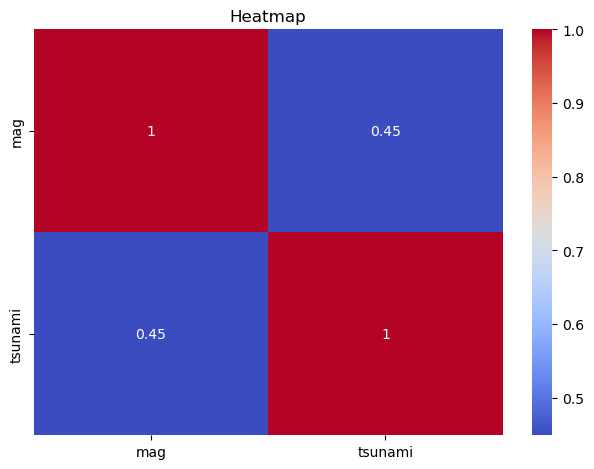

In [10]:
# To select mb only for magType
earthquake_1 = earthquake[(earthquake["magType"] == "mb")]

# The correlation efficient
earthquake_1 = earthquake_1[["mag", "tsunami"]].corr()

# To plot the Heatmap
sns.heatmap(earthquake_1, annot = True, cmap = "coolwarm")
plt.title("Heatmap")
plt.tight_layout()
plt.show()

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [12]:
fb = pd.read_csv("fb_stock_prices_2018.csv")
fb = pd.DataFrame(fb)

In [13]:
fb_2 = fb.set_index("date")

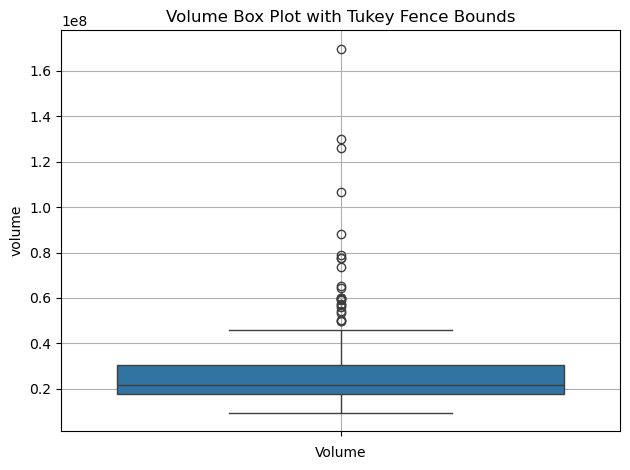

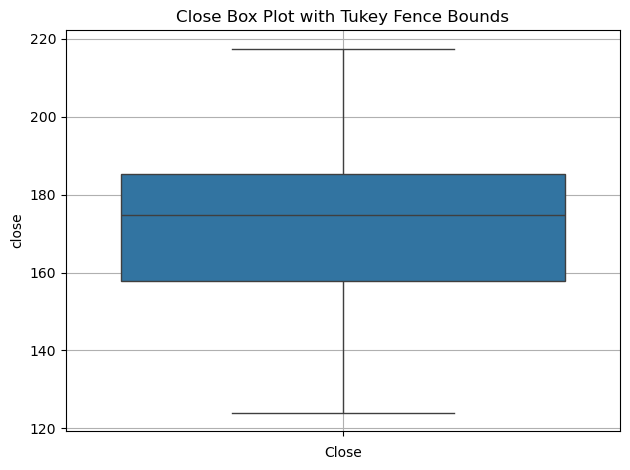

In [14]:
# Iterate through the columns "volume" and "close"
for x in ["volume", "close"]:
    # The 25th and 75th percentile
    q1 = fb_2[x].quantile(0.25)
    q3 = fb_2[x].quantile(0.75)
    
    # The IQR
    iqr = q3 - q1
    
    # The lower and upper bounds with Tukey's method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    sns.boxplot(y = fb[x])
    plt.title(f"{x.capitalize()} Box Plot with Tukey Fence Bounds")
    plt.xlabel(x.capitalize())
    plt.grid(True)
    plt.tight_layout()
    plt.show()

3. Fill in the area between the bounds in the plot from exercise #2.

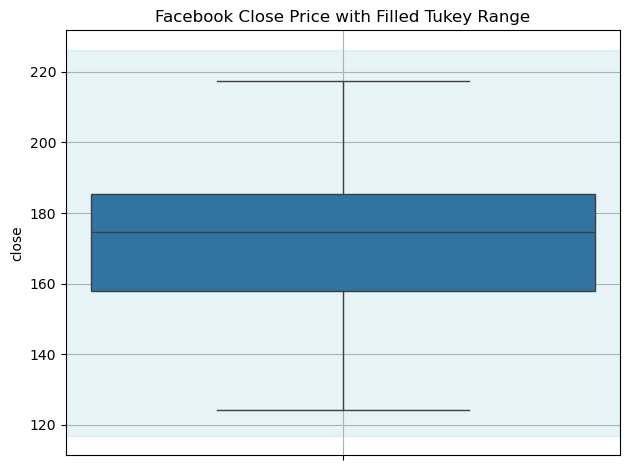

In [16]:
# The 25th and 75th percentile
q1 = fb["close"].quantile(0.25)
q3 = fb["close"].quantile(0.75)

# The IQR
iqr = q3 - q1

# The lower and upper bounds with Tukey's method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# A boxplot for the "close" column
sns.boxplot(y = fb["close"])

# The current y-axis limits
ymin, ymax = plt.ylim()

# To highlight the area between the Tukey bounds
plt.fill_betweenx(y = [lower_bound, upper_bound], x1 = 0, x2 = 1, color = "lightblue", alpha = 0.3, transform = plt.gca().get_yaxis_transform())

plt.title("Facebook Close Price with Filled Tukey Range")
plt.grid(True)
plt.tight_layout()
plt.show()

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

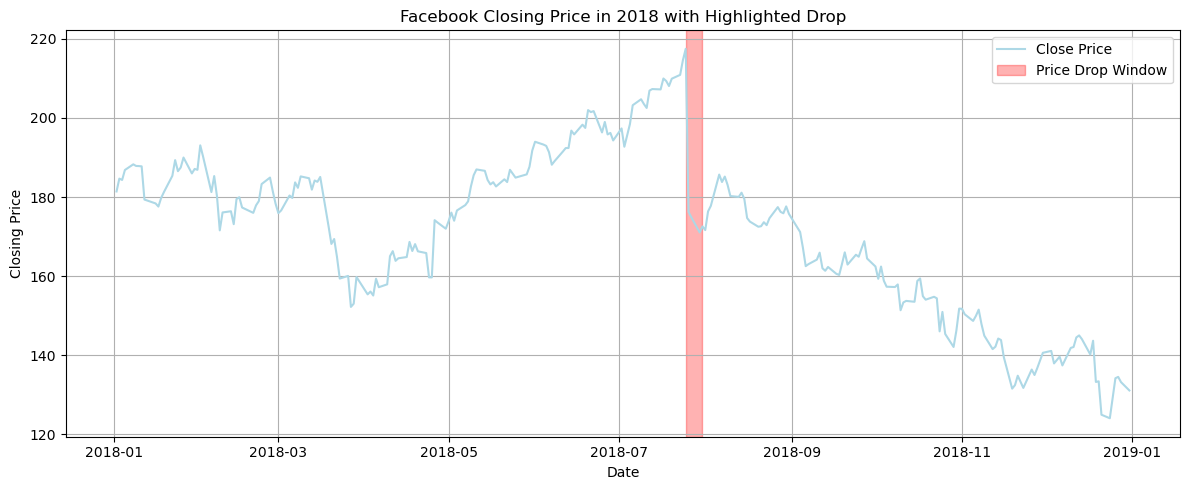

In [18]:
fb = pd.read_csv("fb_stock_prices_2018.csv", parse_dates = ["date"])

# Set the 'date' column as the index
fb.set_index("date", inplace = True)
fig, ax = plt.subplots(figsize = (12, 5))

# Plot the closing price against the date, using a light blue color
ax.plot(fb.index, fb["close"], label = "Close Price", color = "lightblue")

# Change data type
start = pd.Timestamp("2018-07-25")
end = pd.Timestamp("2018-07-31")

# To highlight the period of the price drop
ax.axvspan(start, end, color = "red", alpha = 0.3, label = "Price Drop Window")

ax.set_title("Facebook Closing Price in 2018 with Highlighted Drop")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

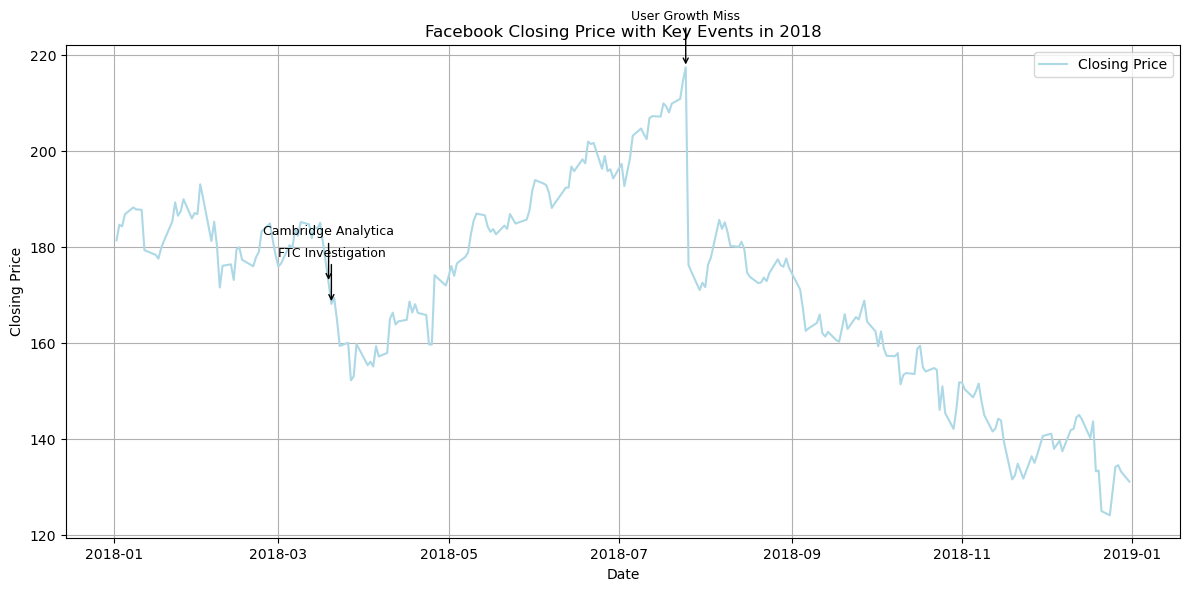

In [20]:
# The the closing price
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(fb.index, fb["close"], label = "Closing Price", color = "lightblue")

# The events
events = {
    "Cambridge Analytica": "2018-03-19",
    "FTC Investigation": "2018-03-20",
    "User Growth Miss": "2018-07-25"
}

# Add annotations using a loop
for label, date in events.items():
    event_date = pd.to_datetime(date)
    price = fb.loc[event_date, "close"]
    ax.annotate(label, xy = (event_date, price), xytext = (event_date, price + 10),
                arrowprops = dict(arrowstyle = "->", color = "black"), fontsize = 9,ha = "center")

ax.set_title("Facebook Closing Price with Key Events in 2018")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")
plt.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

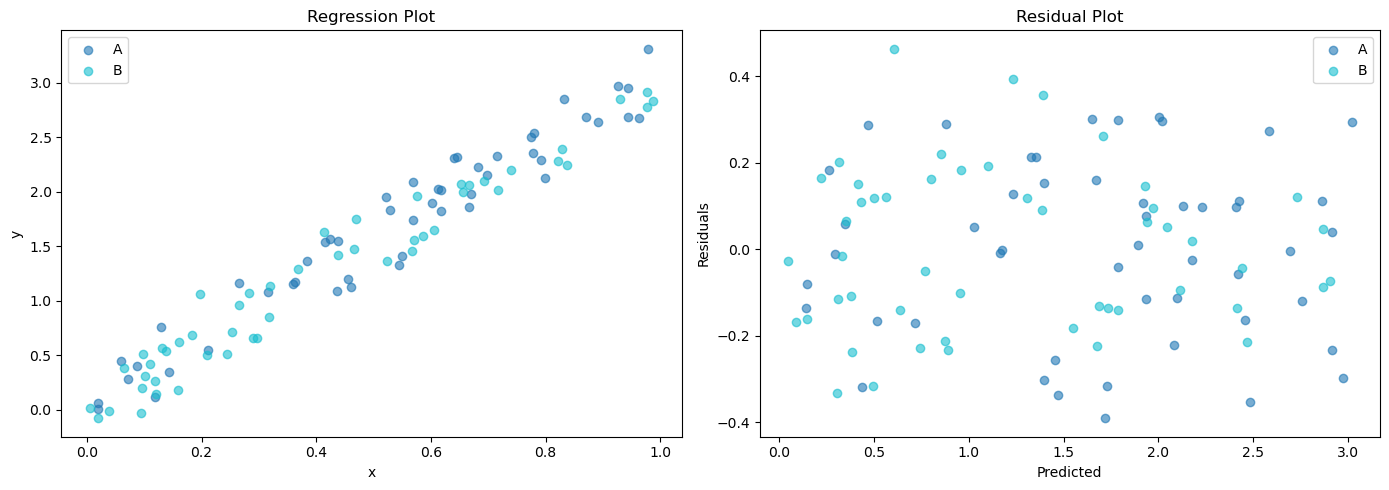

In [22]:
def reg_resid_plots(x, y, group=None):
    import statsmodels.api as sm
    fig, axs = plt.subplots(1, 2, figsize = (14, 5))

    # If no group is provided, assign "All" as the group for all data points
    if group is None:
        group = ["All"] * len(x)

    groups = list(pd.Series(group).unique())
    colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))

    # To loop through each group to create scatter plots for both regression and residual
    for i, g in enumerate(groups):
        mask = (pd.Series(group) == g)
        x_vals = x[mask]
        y_vals = y[mask]

        # Scatter plot for the regression plot
        axs[0].scatter(x_vals, y_vals, color=colors[i], label=str(g), alpha=0.6)

        x_sm = sm.add_constant(x_vals)
        model = sm.OLS(y_vals, x_sm).fit()
        pred_vals = model.predict(x_sm)

        # The scatter plot for the residual plot
        axs[1].scatter(pred_vals, model.resid, color=colors[i], label=str(g), alpha=0.6)

    # The titles and labels
    axs[0].set_title("Regression Plot")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[1].set_title("Residual Plot")
    axs[1].set_xlabel("Predicted")
    axs[1].set_ylabel("Residuals")

    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example data
np.random.seed(0)
x = pd.Series(np.random.rand(100))
y = 3 * x + np.random.normal(0, 0.2, size=100)
group = ["A" if i < 50 else "B" for i in range(100)]

# Call the function with the data
reg_resid_plots(x, y, group)

**Summary/Conclusion:**

- Provide a summary of your learnings and the conclusion for this activity.

To conclude, this laboratory activity demonstrated how to use matplotlib and seaborn to visualize data through various charts. I learned how to create regression and residual plots, build boxplots, generate heatmaps using the ".heatmap()" function, and highlight specific data points in a chart. Overall, these skills will be valuable for analyzing and comparing data in future research projects.